# Home Assignment 3

In [1]:
# pip install PrettyTable
#pip install tabulate

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # enable showing all columns of the df

## 1. Data pre-processing

### 1.1 Data Loading

In [8]:
### Loading the data ###

X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))

### 1.2. Exploratory Data Analysis

In [9]:
### Check data dimensions ###

print("X_train shape:", getattr(X_train, 'shape', len(X_train)))
print("X_ivs shape:", getattr(X_ivs, 'shape', len(X_ivs)))
print("y_train shape:", getattr(y_train, 'shape', len(y_train)))

X_train shape: (7337, 2132)
X_ivs shape: (816, 2132)
y_train shape: (7337,)


In [10]:
### View the data - X_train ###

pd.DataFrame(X_train).sample(5)

0        1     2     3     4     5     6     7     8     9     \
6529  355.160600  355.503   3.0   1.0   5.0   1.0   3.0  25.0  50.0   4.0   
751   480.209616  480.641   6.0   0.0   7.0   0.0   7.0  35.0  63.0   7.0   
681   464.242356  464.566   8.0   3.0   8.0   3.0   6.0  34.0  66.0   8.0   
665   432.172832  432.927   6.0   1.0   7.0   1.0   5.0  30.0  56.0   8.0   
3728  397.236542  397.519   6.0   1.0   6.0   1.0   5.0  29.0  60.0   6.0   

      10        11    12    13    14    15    16    17    18    19    20    \
6529   0.0  0.428571   4.0   2.0   2.0   2.0   1.0   0.0   1.0   1.0   0.0   
751    0.0  0.357143   6.0   4.0   2.0   2.0   3.0   2.0   1.0   1.0   0.0   
681    1.0  0.423077   5.0   3.0   2.0   1.0   3.0   1.0   1.0   2.0   0.0   
665    1.0  0.454545   4.0   2.0   2.0   1.0   3.0   1.0   1.0   2.0   0.0   
3728   1.0  0.652174   4.0   1.0   3.0   2.0   2.0   0.0   1.0   2.0   0.0   

      21    22    23          24     25       26        27         28    \
6529   0.0   2.0   0.0  149.936575  46.17  3.64480  100.5175  15.643171   
751    0.0   2.0   2.0  209.552010  70.63  4.96610  139.2000  20.924170   
681    0.0   1.0   1.0  198.999341  90.06  2.76200  131.8517  19.549149   
665    0.0   0.0   0.0  180.524245  57.70  3.74000  115.9797  17.627814   
3728   0.0   0.0   0.0  172.708814  74.59  3.57348  109.7157  17.068555   

           29        30        31        32         33         34        35    \
6529  10.687447  7.558378  7.558378  5.434295  14.826675   9.035181  5.854606   
751   13.177889  8.708525  8.708525  6.494106  20.107673  12.192290  7.602016   
681   12.042778  6.674385  6.674385  4.754806  19.549149  12.042778  6.674385   
665   10.816619  5.887199  5.887199  4.035976  16.871885  10.438654  5.595291   
3728  10.998225  6.759514  6.759514  5.052972  17.068555  10.998225  6.759514   

          36        37    38         39        40        41        42    43    \
6529  5.854606  4.085591 -1.65  16.798894  5.958299  3.021142  4.003713   0.0   
751   7.602016  5.659418 -3.21  22.266417  8.778857  4.008631  5.584962   0.0   
681   6.674385  4.754806 -3.23  22.556711  9.947714  4.830773  6.599638   0.0   
665   5.595291  3.866425 -2.38  20.875140  9.619210  5.019879  6.693412   0.0   
3728  6.759514  5.052972 -2.26  20.030720  9.492178  5.023133  6.556385   0.0   

      44    45    46    47    48    49    50    51    52    53    54    55    \
6529   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
751    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
681    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
665    0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3728   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      56    57    58    59    60    61    62    63    64    65    66    67    \
6529   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
751    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
681    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
665    0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3728   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      68    69    70    71    72    73    74    75    76    77    78    79    \
6529   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
751    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
681    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
665    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
3728   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

      80    81    82    83    84    85    86    87    88    89    90    91    \
6529   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
751    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [11]:
### View the data - X_ivs ###

pd.DataFrame(y_train).sample(5)

,0
6009,0.149220
2752,0.226120
4518,0.450000
5361,0.592393
1763,0.799478


In [12]:
### Descriptive statistics of X_train ###

df_x = pd.DataFrame(X_train)
df_x.describe()

0            1            2            3            4     \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean    430.518010   431.037078     5.430285     1.206897     6.527327   
std     181.613020   181.757699     4.160569     2.527815     5.983082   
min     135.068414   135.166000     1.000000     0.000000     0.000000   
25%     357.124405   357.429000     4.000000     0.000000     4.000000   
50%     419.107040   419.500000     5.000000     1.000000     6.000000   
75%     472.228141   472.888000     6.000000     1.000000     8.000000   
max    3768.848446  3771.262000    92.000000    47.000000   137.000000   

              5            6            7            8            9     \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      1.128799     4.678070    30.497615    59.165190     6.594930   
std       2.218665     2.789156    12.882724    25.749585     4.403703   
min       0.000000     0.000000    10.000000    19.000000     1.000000   
25%       0.000000     3.000000    25.000000    49.000000     5.000000   
50%       1.000000     4.000000    30.000000    57.000000     6.000000   
75%       1.000000     6.000000    33.000000    65.000000     8.000000   
max      42.000000    58.000000   266.000000   527.000000    93.000000   

              10           11           12           13           14    \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      0.610740     0.412880     4.157285     2.570806     1.586479   
std       1.362184     0.132115     1.199923     1.018602     0.867549   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.333333     4.000000     2.000000     1.000000   
50%       0.000000     0.400000     4.000000     3.000000     1.000000   
75%       1.000000     0.480000     5.000000     3.000000     2.000000   
max      30.000000     1.000000    14.000000     9.000000    11.000000   

              15           16           17           18           19    \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      1.052746     2.006678     0.746899     0.868202     1.259779   
std       0.783258     0.974223     0.814518     0.594819     0.683070   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     0.000000     1.000000     1.000000   
50%       1.000000     2.000000     1.000000     1.000000     1.000000   
75%       1.000000     3.000000     1.000000     1.000000     2.000000   
max      11.000000     9.000000     4.000000     7.000000     7.000000   

              20           21           22           23           24    \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      0.034074     0.048249     0.682704     0.249421   182.840951   
std       0.181431     0.357754     1.587992     0.615764    74.961926   
min       0.000000     0.000000     0.000000     0.000000    59.499552   
25%       0.000000     0.000000     0.000000     0.000000   152.940004   
50%       0.000000     0.000000     0.000000     0.000000   178.194506   
75%       0.000000     0.000000     1.000000     0.000000   198.927877   
max       1.000000     8.000000    29.000000    10.000000  1542.223628   

              25           26           27           28           29    \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean     58.256788     4.093037   120.864912    18.221373    11.270109   
std      62.670539     1.400085    48.037139     7.427662     4.561994   
min       3.240000   -10.523160    40.300500     5.593478     3.306776   
25%      35.580000     3.273420   101.437500    15.166474     9.256720   
50%      50.800000     4.074700   117.723700    17.737779    10.962982   
75%      67.350000     4.836300   131.143700    19.856444    12.356276   
max    1365.490000    16.768600   957.020500   150.889493    89.019955   

            

In [13]:
### Descriptive statistics of y_train ###

df_y = pd.DataFrame(y_train)
df_y.describe()

,0
count,7337.000000
mean,0.388388
std,0.276656
min,0.000000
25%,0.169187
50%,0.382177
75%,0.581929
max,1.000000


In [15]:
### Check for missing values ###

missing_values = np.isnan(X_train).any()
print("Missing values in X_train:", missing_values)

Missing values in X_train: False


In [16]:
### Check for missing values in X_ivs ###

missing_values = np.isnan(X_ivs).any()
print("Missing values in X_ivs:", missing_values)

Missing values in X_ivs: False


In [19]:
### Check how many features have only zeroes ###

zero_columns = (X_train == 0).all(axis=0).sum()
print("Features with all zero values in X_train:", zero_columns)

Columns with all zero values in X_train: 0


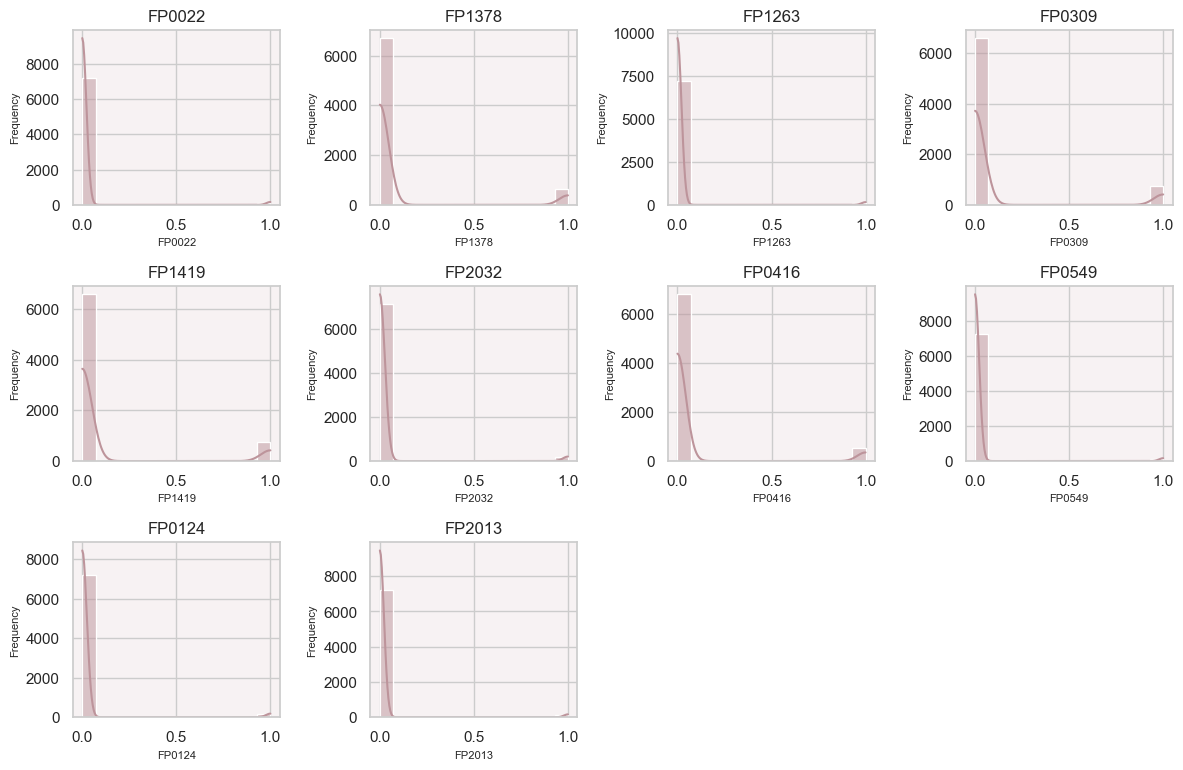

In [30]:
### Check the distribution of some ot the X_train features ###

# Select 10 columns and 10 rows to plot
X_train_df = pd.DataFrame(X_train, columns=col_names)
X_train_df_sample = X_train_df.sample(n=10, axis=1)

# Plot the histograms using seaborn
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f7f2f3"}) # set background color
plt.figure(figsize=(12, 10))
for i, column in enumerate(X_train_df_sample.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(X_train_df_sample[column], kde=True, color='#bd949b')
    plt.title(column, fontsize=12)
    plt.xlabel(column, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()

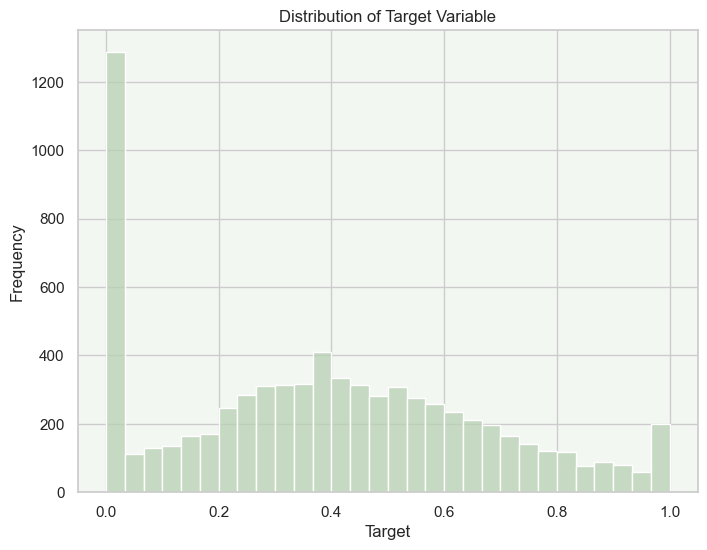

In [24]:
### Check the distribution of the target variable ###

# Create a DataFrame for the target variable
y_train_df = pd.DataFrame(y_train, columns=['target'])

# Plot histogram using Seaborn
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f3f7f2"}) # set the background color
plt.figure(figsize=(8, 6))
sns.histplot(data=y_train_df, x='target', color='#b8d0b3', bins=30)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [70]:
### Detect Outliers in the data with Isolation Forest ###

from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(X_train)
outliers = clf.predict(X_train)
print("Number of outliers:", len(outliers[outliers == -1]))


Number of outliers: 16


### 1.3. Data Pre-processing

Scaling is necessary for some algorithms, but not for others. For example, decision trees and random forests do not require scaling, but support vector machines (SVMs) and k-nearest neighbors (KNN) do.
Because the dataset contains features with different scales, we will standardize the numerical features.

### 1.3.1. Scaling

In [31]:
### Scale the data ###

# Standardize the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

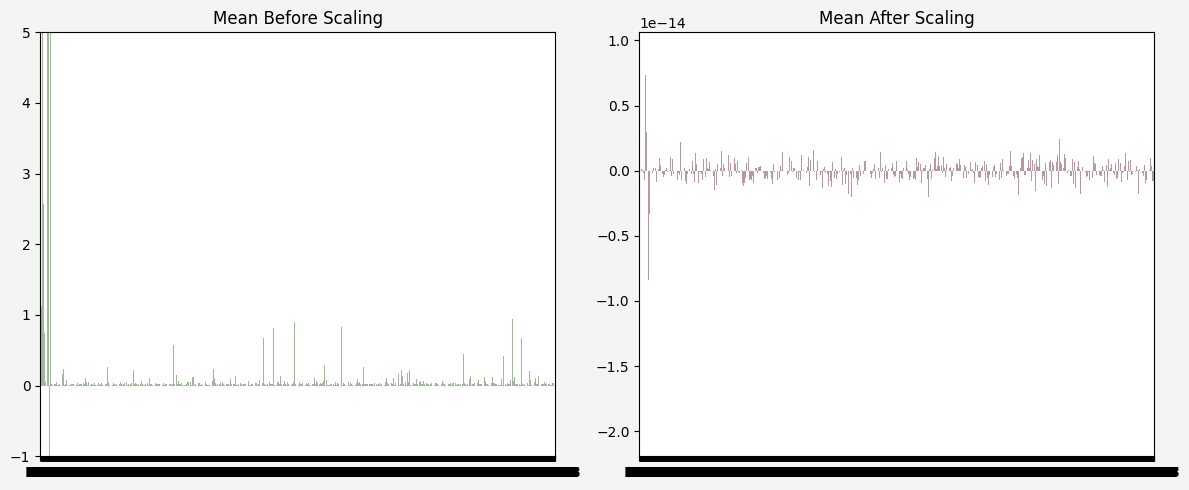

In [39]:
### Check the summary statistics before and after Standardization X_train ### 

# Summary statistics before transformation
before_summary_mean = np.mean(X_train, axis=0)
before_summary_std = np.std(X_train, axis=0)

# Summary statistics after transformation
after_summary_mean = np.mean(X_train_scaled, axis=0)
after_summary_std = np.std(X_train_scaled, axis=0)

# Reset Matplotlib style
plt.style.use('default')

# Plot a side-by-side comparison of mean and standard deviation
plt.figure(figsize=(12, 5), facecolor="#f5f4f4")

plt.subplot(1, 2, 1)
sns.barplot(x=col_names, y=before_summary_mean, color='#9bbd94')
plt.title('Mean Before Scaling')
plt.ylim(-1,5)

plt.subplot(1, 2, 2)
sns.barplot(x=col_names, y=after_summary_mean, color='#bd949b')
plt.title('Mean After Scaling')

plt.tight_layout()
plt.show()

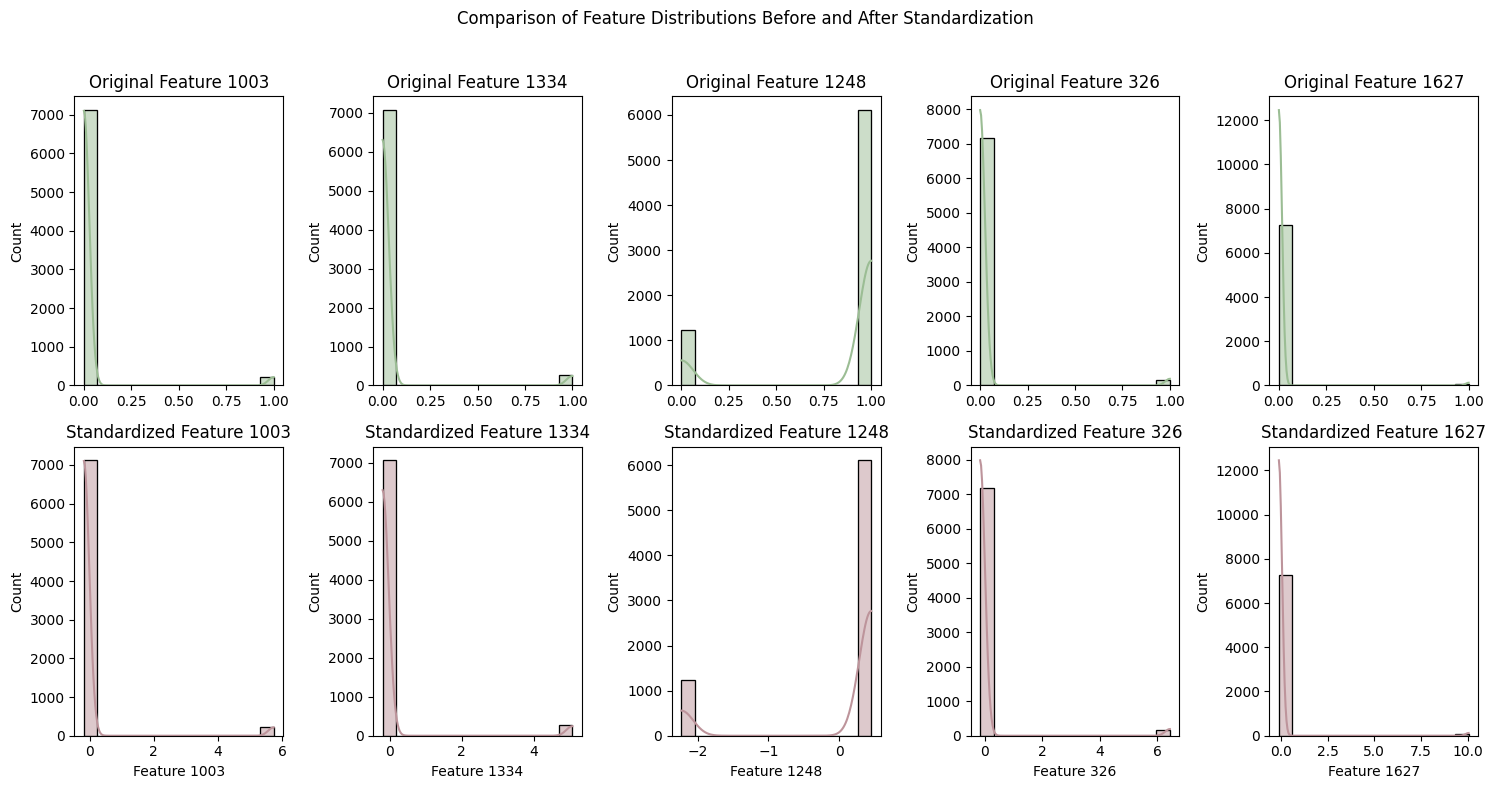

In [47]:
### Check the distribution of some features before and after Standardization ###

# Randomly select 5 features for visualization
selected_features_indices = np.random.choice(range(X_train.shape[1]), size=5, replace=False) # 

# Convert to a DataFrame for easier handling
columns = [f'Feature {i+1}' for i in range(X_train.shape[1])]
X_train_df = pd.DataFrame(X_train_scaled, columns=columns)

# Plot the distribution of the randomly selected features before and after standardization
plt.style.use('default') # reset matplotlib style
plt.figure(figsize=(15, 8))
plt.suptitle('Comparison of Feature Distributions Before and After Standardization')

for i, feature_index in enumerate(selected_features_indices, 1):
    plt.subplot(2, 5, i)
    sns.histplot(X_train[:, feature_index], kde=True, color='#9bbd94')
    plt.title(f'Original {columns[feature_index]}')

    plt.subplot(2, 5, i + 5)
    sns.histplot(X_train_df.iloc[:, feature_index], kde=True, color='#bd949b')
    plt.title(f'Standardized {columns[feature_index]}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplot layout
plt.show()


### 1.3.2. Transformation (Log Transformation)

In [63]:
### Log Transform the data ###

X_train_log_transformed = np.log1p(X_train)
X_train_log_transformed[np.isinf(X_train_log_transformed)] = np.nan  # Handle negative infinity resulting from log transformation

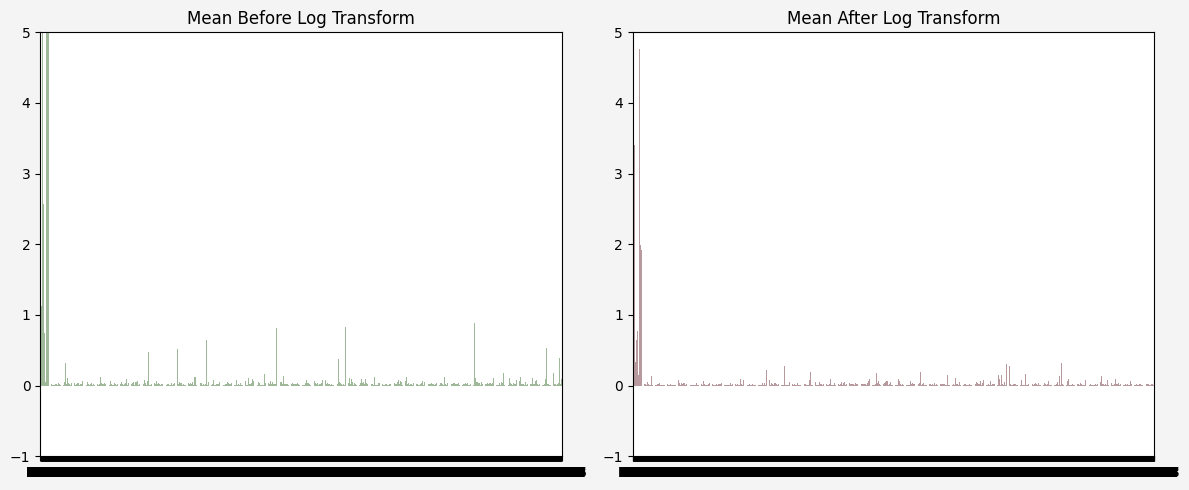

In [46]:
### Check the summary statistics before and after Log Transform ### 

# Summary statistics before transformation
before_summary_mean = np.mean(X_train, axis=0)
before_summary_std = np.std(X_train, axis=0)

# Summary statistics after transformation
after_summary_mean = np.mean(X_train_log_transformed, axis=0)
after_summary_std = np.std(X_train_log_transformed, axis=0)

# Plot a side-by-side comparison of mean and standard deviation
plt.figure(figsize=(12, 5), facecolor="#f5f4f4")

plt.subplot(1, 2, 1)
sns.barplot(x=col_names, y=before_summary_mean, color='#9bbd94')
plt.title('Mean Before Log Transform')
plt.ylim(-1,5)

plt.subplot(1, 2, 2)
sns.barplot(x=col_names, y=after_summary_mean, color='#bd949b')
plt.title('Mean After Log Transform')
plt.ylim(-1,5)

plt.tight_layout()
plt.show()

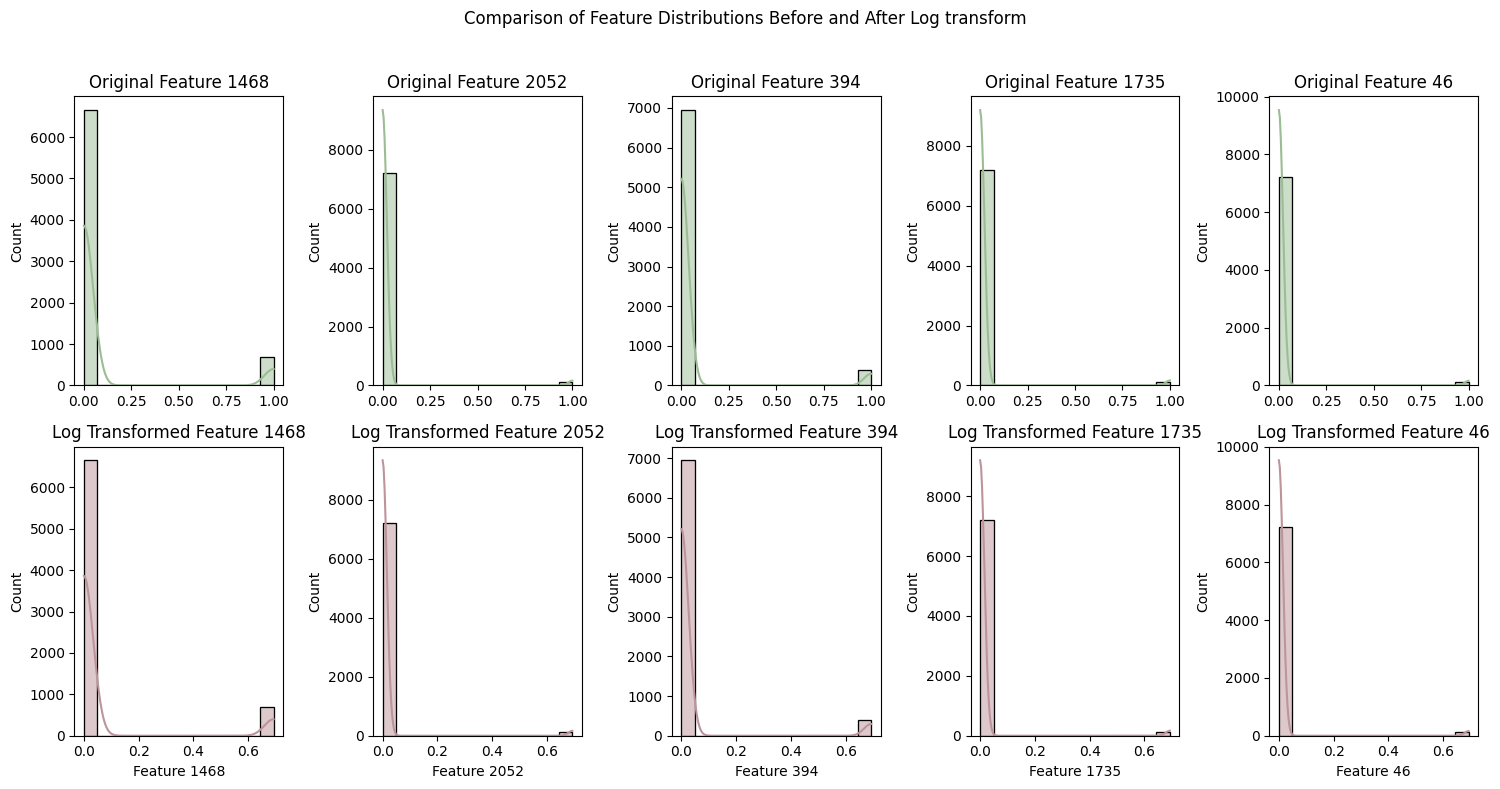

In [56]:
### Check the distribution of some features before and after Log Tranform ###

# Randomly select 5 features for visualization
selected_features_indices = np.random.choice(range(X_train.shape[1]), size=5, replace=False) # 

# Convert to a DataFrame for easier handling
columns = [f'Feature {i+1}' for i in range(X_train.shape[1])]
X_train_df = pd.DataFrame(X_train_log_transformed, columns=columns)

# Plot the distribution of the randomly selected features before and after standardization
plt.figure(figsize=(15, 8))
plt.suptitle('Comparison of Feature Distributions Before and After Log transform')

for i, feature_index in enumerate(selected_features_indices, 1):
    plt.subplot(2, 5, i)
    sns.histplot(X_train[:, feature_index], kde=True, color='#9bbd94')
    plt.title(f'Original {columns[feature_index]}')

    plt.subplot(2, 5, i + 5)
    sns.histplot(X_train_df.iloc[:, feature_index], kde=True, color='#bd949b')
    plt.title(f'Log Transformed {columns[feature_index]}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplot layout
plt.show()

### 1.3.3. Transformation (Power Transformation)

In [50]:
### Power Transform the data ###

pt = PowerTransformer()
X_train_power_transformed = pt.fit_transform(X_train)

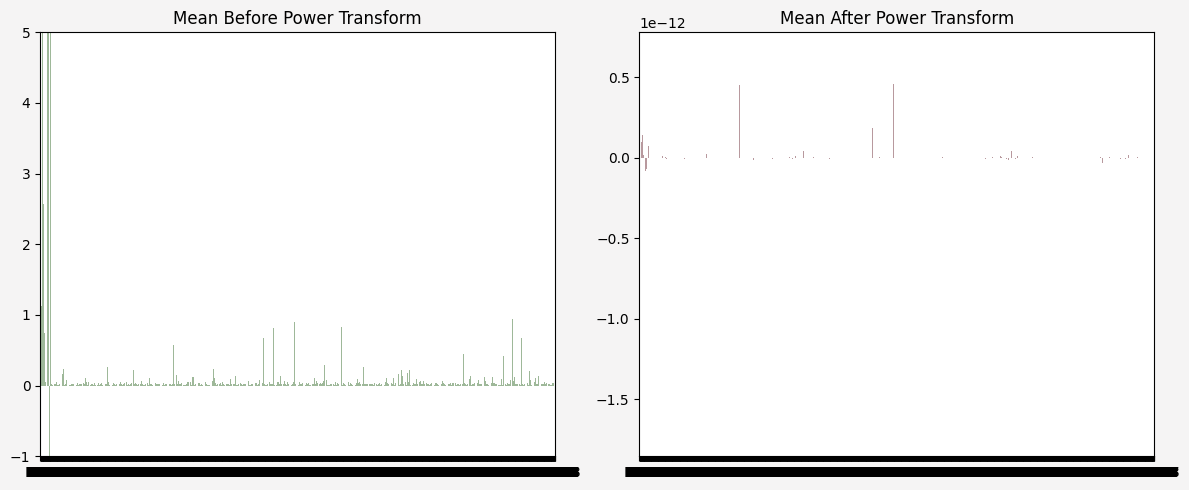

In [62]:
### Check the summary statistics before and after Power Transform ### 

# Summary statistics before transformation
before_summary_mean = np.mean(X_train, axis=0)
before_summary_std = np.std(X_train, axis=0)

# Summary statistics after transformation
after_summary_mean = np.mean(X_train_power_transformed, axis=0)
after_summary_std = np.std(X_train_power_transformed, axis=0)

# Plot a side-by-side comparison of mean and standard deviation
plt.figure(figsize=(12, 5), facecolor="#f5f4f4")

plt.subplot(1, 2, 1)
sns.barplot(x=col_names, y=before_summary_mean, color='#9bbd94')
plt.title('Mean Before Power Transform')
plt.ylim(-1,5)

plt.subplot(1, 2, 2)
sns.barplot(x=col_names, y=after_summary_mean, color='#bd949b')
plt.title('Mean After Power Transform')

plt.tight_layout()
plt.show()

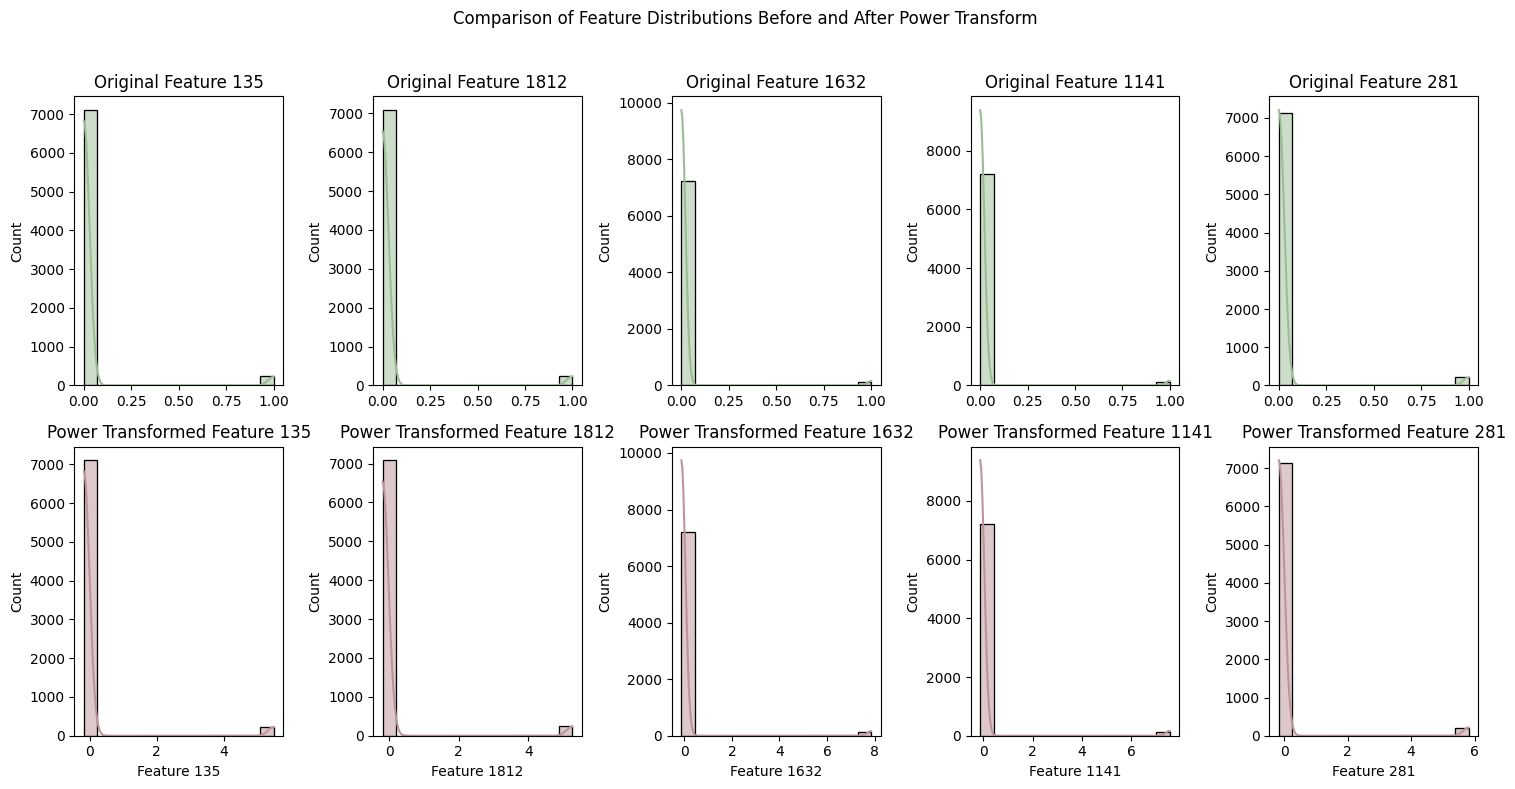

In [58]:
### Check the distribution of some features before and after Power Transformation ###

# Randomly select 5 features for visualization
selected_features_indices = np.random.choice(range(X_train.shape[1]), size=5, replace=False) # 

# Convert to a DataFrame for easier handling
columns = [f'Feature {i+1}' for i in range(X_train.shape[1])]
X_train_df = pd.DataFrame(X_train_power_transformed, columns=columns)

# Plot the distribution of the randomly selected features before and after standardization
plt.figure(figsize=(15, 8))
plt.suptitle('Comparison of Feature Distributions Before and After Power Transform')

for i, feature_index in enumerate(selected_features_indices, 1):
    plt.subplot(2, 5, i)
    sns.histplot(X_train[:, feature_index], kde=True, color='#9bbd94')
    plt.title(f'Original {columns[feature_index]}')

    plt.subplot(2, 5, i + 5)
    sns.histplot(X_train_df.iloc[:, feature_index], kde=True, color='#bd949b')
    plt.title(f'Power Transformed {columns[feature_index]}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplot layout
plt.show()


### 1.3.4. PCA

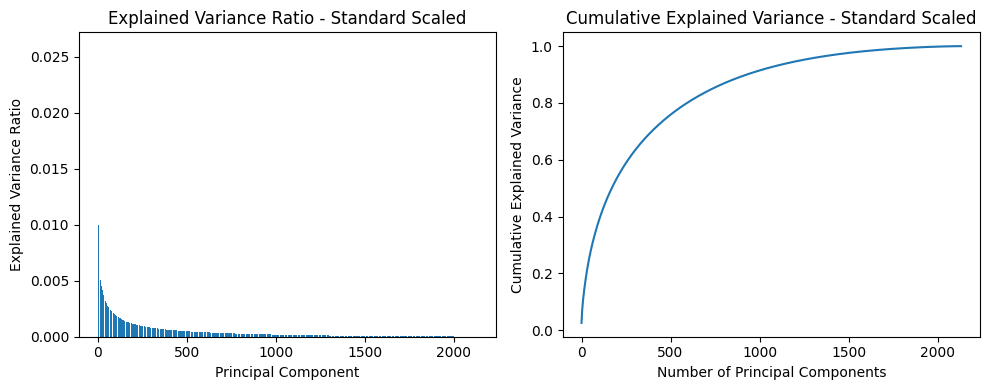


Cumulative Explained Variance for the first 5 components - Standard Scaled:
[0.02588375 0.03894337 0.05149653 0.06307911 0.0730216 ]


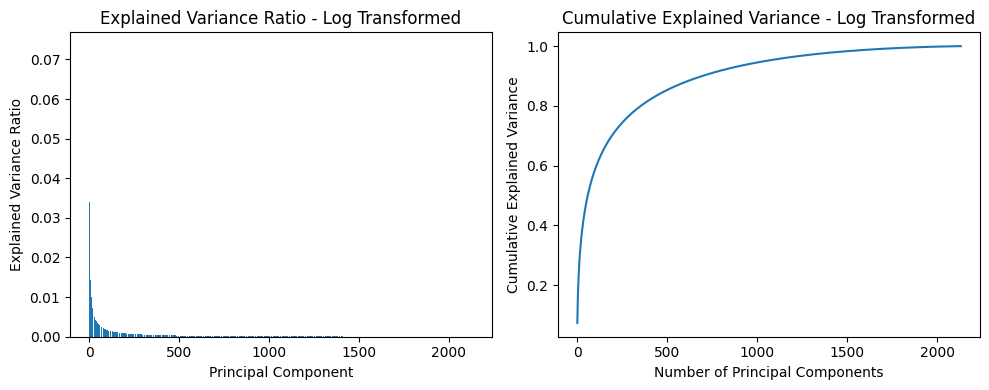


Cumulative Explained Variance for the first 5 components - Log Transformed:
[0.07318023 0.10727379 0.13556197 0.16344993 0.18086774]


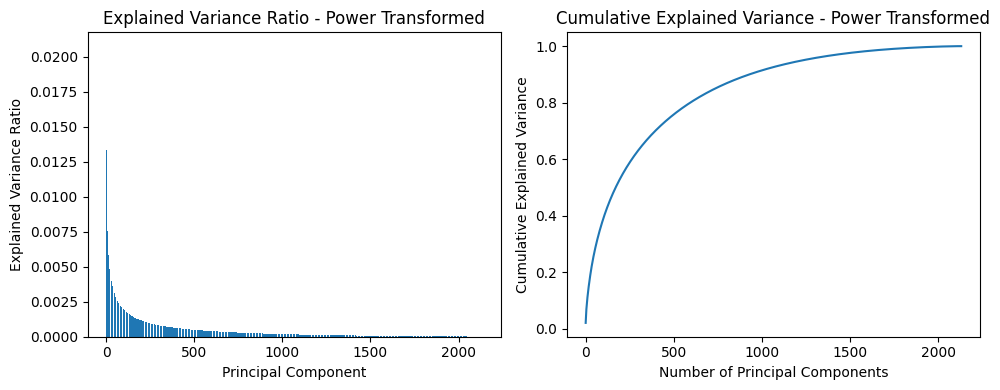


Cumulative Explained Variance for the first 5 components - Power Transformed:
[0.02070155 0.03403734 0.04696745 0.05931952 0.06912772]


In [64]:
### PCA or ###

# List of preprocessed datasets and their names
datasets = [X_train_scaled, X_train_log_transformed, X_train_power_transformed]
dataset_names = ['Standard Scaled', 'Log Transformed', 'Power Transformed']

# Perform PCA and evaluate for each preprocessed dataset
for i, X_preprocessed in enumerate(datasets):
    # Handle NaN values
    X_preprocessed = np.nan_to_num(X_preprocessed)

    pca = PCA()
    X_pca = pca.fit_transform(X_preprocessed)

    # Plot explained variance ratio
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
    plt.title(f'Explained Variance Ratio - {dataset_names[i]}')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')

    # Plot cumulative explained variance
    plt.subplot(1, 2, 2)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title(f'Cumulative Explained Variance - {dataset_names[i]}')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')

    plt.tight_layout()
    plt.show()

    # Print the cumulative explained variance for the first k components
    k_components = 5
    print(f"\nCumulative Explained Variance for the first {k_components} components - {dataset_names[i]}:")
    print(np.cumsum(pca.explained_variance_ratio_)[:k_components])


## 2. Regression models

In [ ]:
# List of preprocessed datasets
preprocessed_datasets = [X_train, X_ivs]  # Add more preprocessed datasets if needed

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Regression models to test
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

# Results storage
results = []

# Iterate over preprocessed datasets
for dataset in preprocessed_datasets:
    # Iterate over regression models
    for model_name, model in models.items():
        # Fit the model
        model.fit(dataset, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Store results
        results.append({
            'Model': model_name,
            'Dataset': 'Preprocessed Dataset',  # Update with the specific preprocessing method
            'MSE': mse,
            'MAE': mae
        })

# Convert results to a DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', hue='Dataset', data=results_df)
plt.title('Mean Squared Error Comparison Across Models and Datasets')
plt.ylabel('Mean Squared Error')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', hue='Dataset', data=results_df)
plt.title('Mean Absolute Error Comparison Across Models and Datasets')
plt.ylabel('Mean Absolute Error')
plt.show()

### 2.1 Training the models

## 3. Predictions calculation

## 4. Results